In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlite3


In [39]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [41]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [42]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11436\3555078317.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [43]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [44]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [45]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

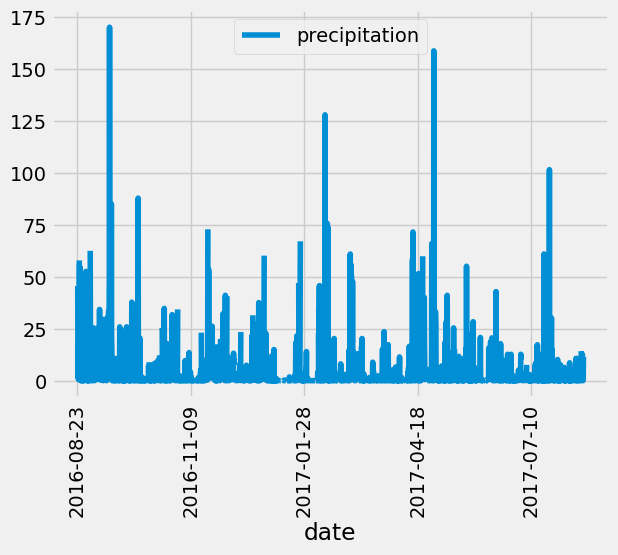

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recent = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip, columns= ['date', 'precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by= 'date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(x= 'date', y= 'precipitation', rot = 90)

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

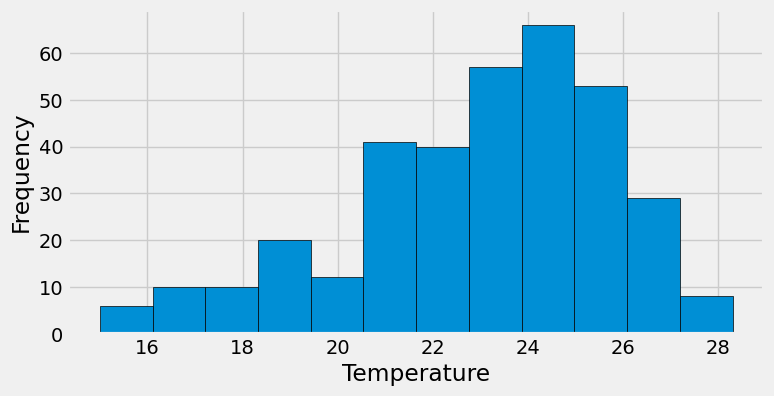

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= year_ago).all()
temp_df = pd.DataFrame(temp, columns=['tobs'])
temp_df

# Plotting with Matplotlib to plot the data
plt.figure(figsize=(8, 4))
plt.hist(temp_df['tobs'], bins=12, edgecolor= 'black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [33]:
# Close Session
session.close()


In [59]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hawaii.sqlite')
cursor = conn.cursor()

# Execute a query to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print table names
print("Tables in the database:", [table[0] for table in tables])

# Close the connection
conn.close()

Tables in the database: ['measurement', 'sqlite_sequence', 'station']


In [56]:
# Insert example data
cursor.execute('''
INSERT INTO measurement (date, prcp, station, tobs)
VALUES ('2024-08-14', 0.00, 'USC00519281', 77)
''')

cursor.execute('''
INSERT INTO station (station, name, latitude, longitude, elevation)
VALUES ('USC00519281', 'Station Name', 21.308, -157.858, 0.0)
''')

# Commit changes and close the connection
conn.commit()
conn.close()